<center>
    <h3>University of Toronto</h3>
    <h3>Department of Mechanical and Industrial Engineering</h3>
    <h3>MIE368 Analytics in Action </h3>
    <h3>(Fall 2020)</h3>
    <hr>
    <h1>Quiz 0: Data Cleaning and Analysis</h1>
    <h3>September 17, 2020</h3>
</center>

<h1>Section One </h1>

Q: Which Pandas method can be seen as "gluing together" multiple DataFrames?

> A: concat

Q: What is the benefit of imputing missing data?

> A: Often a row may have lots of good information in it except for one or two missing elements. Instead of throwing away all of that information, we can estimate what value might fill the missing spot.

Q: Why must we convert categorical columns into boolean columns before we begin modelling?

> A: Most models cannot handle categorical data unless it is encoded as numbers. There are some advanced classes of models that can handle text, but they are beyond the scope of this course. 

Q: Which package is used for numerical methods?

> A: numpy

Q: Which package is used for statistical visualizations?

> A: seaborn

Q: Which package is used for many machine learning models?

> A: sklearn

Q: Which package do we use for data storage/manipulation?

> A: pandas


<h1>Section Two </h1>

__Instructions__

*   Please use this Colab notebook that has the required code to import the necessary packages and data. 
*   Any additional code you will need to answer the questions can be added to this notebook. Please remember to copy and paste the code at the bottom of the Quercus quiz and clearly label which question each piece of code belongs to. 




In this quiz, we're going to use the [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps) dataset. Each row in the dataset contains information on a given Google Play Store app.


The columns in the dataset are as follows:

* **App**: Application name
* **Category**: Category the app belongs to
* **Rating**: Overall user rating of the app
* **Reviews**: Number of user reviews for the app (as when scraped)
* **Size**: Size of the app (as when scraped)
* **Installs**: Number of user downloads/installs for the app
* **Type**: Paid or Free
* **Price**: Price of the app
* **Content Rating**: Age group the app is targeted at
* **Genres**: An app can belong to multiple genres (apart from its main category)
* **Last Updated**: Date when the app was last updated on Play Store
* **Current Ver**: Current version of the app available on Play Store
* **Android Ver**: Min required Android version

In [ ]:
# Run this code

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer as Imputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Run this code

df = pd.read_csv('https://docs.google.com/uc?export=download&id=1Yj64oSxrZJ75NHyo2dB3F3Zi_9RbI36C')
df['Reviews'] = df['Reviews'].apply(pd.to_numeric,errors='coerce')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## __Question 7.__ (/1)

How many rows/columns are in the dataset (`df`)?



In [ ]:
# Write your code here.

# -------------------

df.shape

# -------------------

___
## __Answer__:
10,841 rows and 13 columns
___

## __Question 9.__ (/1)

Which columns currently have a numeric data type?

In [ ]:
# Write your code here.

# -------------------

df.dtypes

# -------------------

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

___
## __Answer__:
Rating and reviews
___

## __Question 11.__ (/1)

What was the mean rating for all the rows? What was the mean number of reviews for all the rows?

In [ ]:
# Write your code here.

# -------------------

df.mean()

# -------------------

Rating          4.193338
Reviews    444152.896033
dtype: float64

___
## __Answer__:
Rating mean = 4.2 and reviews mean = 444152.9
___

## __Question 13.__ (/2)

_df_racing_ is a dataframe containing the racing games in the dataset. _df_strategy_ is a dataframe containing the strategy games in the dataset. How many racing/strategy games are free? How many are paid? What is the breakdown for Content Rating for each type.

In [ ]:
#Run this code

df_strategy = df.loc[(df.Category=='GAME') & (df.Genres=='Strategy')].sort_values('Reviews',ascending=False)
df_racing = df.loc[(df.Category=='GAME') & (df.Genres=='Racing')].sort_values('Reviews',ascending=False)


In [ ]:
# Write your code here.

# -------------------

# For solutions purposes, run the appropriate line for each question in the question bank

df_racing.groupby('Type').size()
df_racing.groupby('Content Rating').size()
df_strategy.groupby('Type').size()
df_strategy.groupby('Content Rating').size()

# -------------------

___
## __Answer__:
Racing Games: 

Free = 95 & Paid = 3
For Everyone = 76 & Mature = 5

Strategy Games

Free = 23 & Paid = 1
For Everyone = 14 & Teen = 9
___

## __Question 15.__ (/2)

What are the three categories/genres with the most apps?

In [ ]:
# Write your code here.

# -------------------

# For solutions purposes, run the appropriate line for each question in the question bank

df.groupby('Category').size().sort_values(ascending=False)[:3]
df.groupby('Genres').size().sort_values(ascending=False)[:3]


# -------------------

___
## __Answer__:
Three _categories_ with most apps: 

Family, Game, Tools

Three _genres_ with the most apps:

Tools, Entertainment, Education
___

## __Question 17.__ (/2)

Now create a single graph that displays the Rating histogram for apps from the three specified categories.

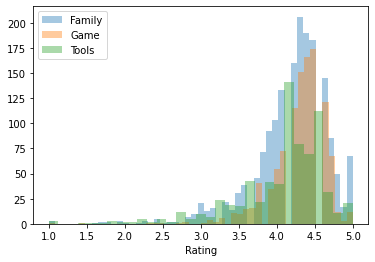

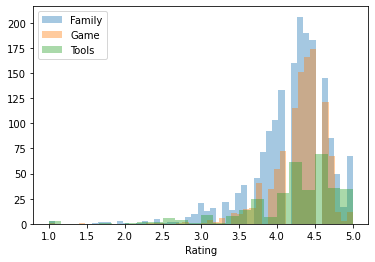

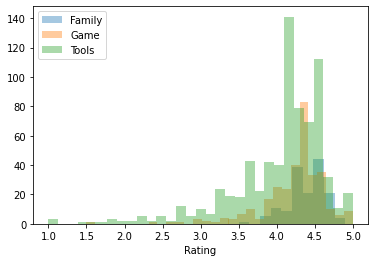

In [ ]:
# Write your code here.

# -------------------

# For Family, Game and Tools

sns.distplot(df.loc[df.Category=='FAMILY'].Rating.dropna(),kde=False,label='Family')
sns.distplot(df.loc[df.Category=='GAME'].Rating.dropna(),kde=False,label='Game')
sns.distplot(df.loc[df.Category=='TOOLS'].Rating.dropna(),kde=False,label='Tools')
plt.legend()
plt.show()

# For Family, Game and Medical

sns.distplot(df.loc[df.Category=='FAMILY'].Rating.dropna(),kde=False,label='Family')
sns.distplot(df.loc[df.Category=='GAME'].Rating.dropna(),kde=False,label='Game')
sns.distplot(df.loc[df.Category=='MEDICAL'].Rating.dropna(),kde=False,label='Tools')
plt.legend()
plt.show()

# For Education, Sports, Tools

sns.distplot(df.loc[df.Category=='EDUCATION'].Rating.dropna(),kde=False,label='Family')
sns.distplot(df.loc[df.Category=='SPORTS'].Rating.dropna(),kde=False,label='Game')
sns.distplot(df.loc[df.Category=='TOOLS'].Rating.dropna(),kde=False,label='Tools')
plt.legend()
plt.show()

# -------------------